# Stock Market Prediction
Stock market price prediction for MMAX to for different return periods using ---- algorithm


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff



In [2]:
data=pd.read_csv("C:\\Users\\khan1\\OneDrive\\Desktop\\823\\Ind_assignment_data.csv")

# 1. Exploratory Data Analysis

In [3]:
data.head()

,Date,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
0,1.0,33.482319,34.465744,50.064999,976.619995,137.422821,30.548828,76.522003,26.870838,53.836395,...,16.140646,63.823997,199.325455,208.325409,2434.50,21397.29,10.48,111.36,1.2659,1.1148
1,2.0,34.008343,34.619576,50.187000,986.090027,137.280762,30.557764,76.690002,26.957619,54.107803,...,16.183868,64.019783,202.829193,207.332001,2438.30,21394.76,10.02,111.26,1.2727,1.1196
2,3.0,33.785179,34.510723,49.699001,972.090027,136.677109,30.843687,75.498001,26.855061,53.954002,...,16.382711,63.853378,202.838623,209.080063,2439.07,21409.55,9.90,111.48,1.2732,1.1196
3,4.0,31.489800,34.016071,48.839001,948.090027,136.464066,30.566696,72.473999,26.642052,53.338821,...,16.261677,62.110935,201.868484,203.597061,2419.38,21310.66,11.06,112.42,1.2791,1.1300
4,5.0,32.023800,34.513088,49.516499,961.010010,136.978943,30.897297,74.248001,26.626272,53.537861,...,16.252941,62.022831,204.524536,204.036484,2440.69,21454.61,10.03,112.18,1.2936,1.1364


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1141 non-null   float64
 1   MMAX     1140 non-null   float64
 2   AAPL     1141 non-null   float64
 3   AMZN     1141 non-null   float64
 4   GOOGL    1141 non-null   float64
 5   MCD      1141 non-null   float64
 6   GM       1141 non-null   float64
 7   TSLA     1141 non-null   float64
 8   PFE      1141 non-null   float64
 9   SBUX     1141 non-null   float64
 10  TWTR     1141 non-null   float64
 11  VZ       1141 non-null   float64
 12  WYNN     1141 non-null   float64
 13  KHC      1141 non-null   float64
 14  JNJ      1141 non-null   float64
 15  HST      1141 non-null   float64
 16  HLT      1141 non-null   float64
 17  FDX      1141 non-null   float64
 18  DPZ      1141 non-null   float64
 19  SP500    1141 non-null   float64
 20  DJIA     1141 non-null   float64
 21  VIXCLS   1141 

<AxesSubplot:title={'center':'Correlation Matrix'}>

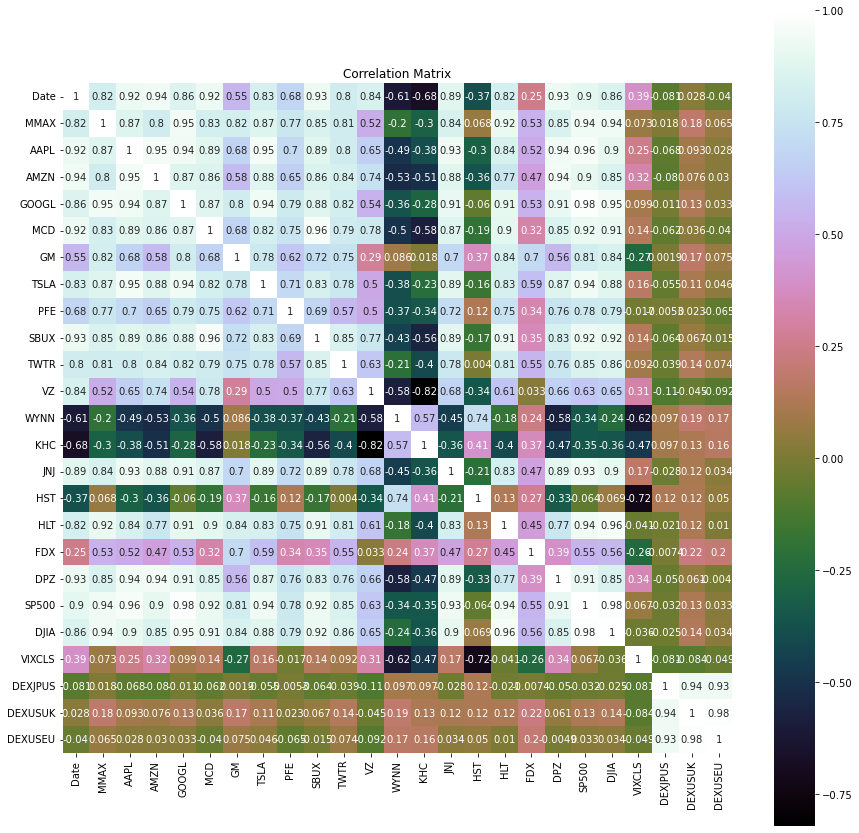

In [5]:
correlation = data.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

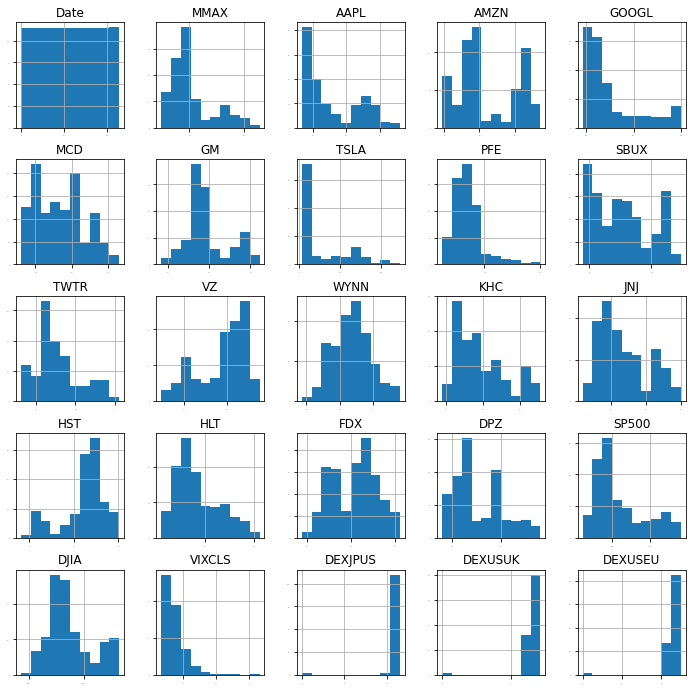

In [6]:
# histograms
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

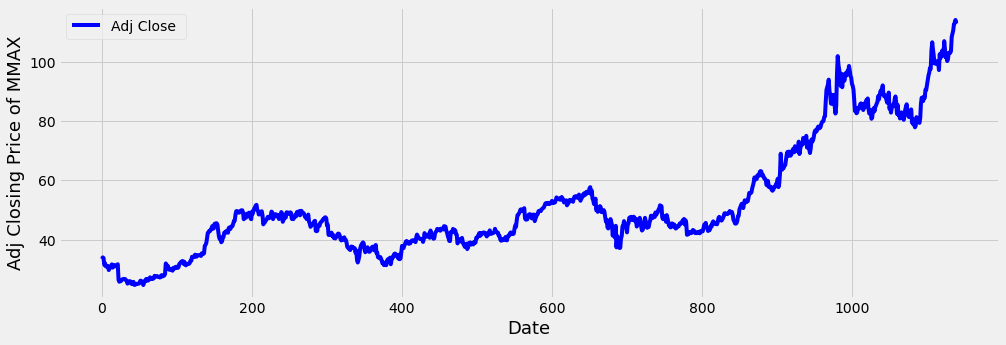

In [8]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(15, 5))
fig = go.Figure()
ax.set_xlabel ("Date", fontsize=18)
ax.set_ylabel ("Adj Closing Price of MMAX", fontsize=18);

plt.plot(data['MMAX'],"-b", label="Adj Close ")
plt.legend(loc="upper left")
plt.show()




# 2. Data Preprocessing

In [9]:
return_period = 1
Y = np.log(data.loc[:, ('MMAX')]).diff(1).shift(-return_period)
Y.name = Y.name +'_pred'

X = np.log(data).diff(1)
X4 = pd.concat([np.log(data.loc[:, ( 'MMAX')]).diff(i) for i in [20, 200]], axis=1).dropna()
X4.columns = ['20D', '200D']

dataset = pd.concat([Y, X,X4], axis=1).dropna()
Y = dataset.loc[:,Y.name]
X = dataset.loc[:, X.columns]

In [10]:
dataset

,MMAX_pred,Date,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,...,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU,20D,200D
200,-0.013400,0.004988,0.052935,0.018643,0.021209,0.015959,0.009506,0.032252,0.050620,0.013724,...,0.015583,-0.003146,0.016589,0.017728,-0.061572,0.002239,0.001767,0.001460,-0.003901,0.389766
201,0.022123,0.004963,-0.013400,-0.004686,-0.006405,-0.011098,0.003496,-0.001793,-0.012450,-0.004461,...,0.000000,-0.003026,-0.005541,-0.008994,-0.011300,-0.004858,0.002328,0.003721,-0.008459,0.360778
202,0.012284,0.004938,0.022123,0.009810,0.014919,0.011860,-0.010586,-0.004369,-0.023026,0.014700,...,0.016295,0.002076,0.008217,0.012064,-0.090431,0.004858,0.003516,-0.005181,0.009484,0.389485
203,0.008870,0.004914,0.012284,0.003382,-0.012302,-0.001206,0.000681,-0.002579,0.021063,0.000000,...,0.010609,-0.005024,-0.002891,-0.005033,-0.060185,0.002048,0.000772,0.000162,0.027793,0.472128
204,0.012029,0.004890,0.008870,0.006219,0.007457,0.009663,-0.000619,0.011297,-0.030871,0.005766,...,0.022407,0.008775,0.008076,0.008702,-0.050055,-0.002421,0.005387,0.004130,0.027972,0.464182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,0.010012,0.000881,0.009930,0.015203,0.003632,0.020302,0.002078,0.023272,0.072271,0.010127,...,-0.007930,0.009148,0.010129,0.007332,-0.120225,0.000964,0.006918,0.004603,0.089129,0.417866
1135,0.019465,0.000881,0.010012,0.003637,0.000184,0.003419,0.003805,0.014692,0.056020,-0.014206,...,0.015324,0.020377,0.006204,0.005486,-0.036626,0.001749,0.004859,-0.000353,0.104471,0.397386
1136,0.002022,0.000880,0.019465,0.022715,-0.008212,0.006716,0.008574,0.009096,0.024935,0.008312,...,0.009528,0.020616,0.013744,0.009739,-0.015713,0.003751,0.002086,0.000795,0.148178,0.422953
1137,0.010138,0.000879,0.002022,-0.005784,0.005827,-0.008279,-0.001343,-0.005588,-0.005013,-0.020306,...,0.000741,0.001004,-0.001011,0.002636,-0.007950,-0.000871,-0.000447,-0.001325,0.096507,0.442980


In [11]:
dataset=dataset.drop(['MMAX', 'Date'], axis=1)
X=X.drop(['MMAX', 'Date'], axis=1)

In [12]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.fillna((dataset.mean()), inplace=True)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna((X.mean()), inplace=True)

In [13]:
def series_to_supervised(data, lag=1):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)    
    cols, names = list(), list()
    for i in range(lag, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (df.columns[j], i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg = pd.DataFrame(data.iloc[:,0]).join(agg)
    agg.dropna(inplace=True)
    return agg

In [17]:
dataset= series_to_supervised(dataset,1)
dataset.tail(5)

,MMAX_pred,MMAX_pred(t-1),AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),...,FDX(t-1),DPZ(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),20D(t-1),200D(t-1)
1134,0.010012,0.009930,0.018907,0.019782,0.013088,0.010112,0.013783,0.041987,-0.034512,0.020874,...,0.025730,-0.001226,0.017622,0.015919,-0.084827,0.005801,0.002342,-0.002304,0.078804,0.405004
1135,0.019465,0.010012,0.015203,0.003632,0.020302,0.002078,0.023272,0.072271,0.010127,0.012336,...,-0.007930,0.009148,0.010129,0.007332,-0.120225,0.000964,0.006918,0.004603,0.089129,0.417866
1136,0.002022,0.019465,0.003637,0.000184,0.003419,0.003805,0.014692,0.056020,-0.014206,0.005622,...,0.015324,0.020377,0.006204,0.005486,-0.036626,0.001749,0.004859,-0.000353,0.104471,0.397386
1137,0.010138,0.002022,0.022715,-0.008212,0.006716,0.008574,0.009096,0.024935,0.008312,0.016329,...,0.009528,0.020616,0.013744,0.009739,-0.015713,0.003751,0.002086,0.000795,0.148178,0.422953
1138,-0.010665,0.010138,-0.005784,0.005827,-0.008279,-0.001343,-0.005588,-0.005013,-0.020306,0.011750,...,0.000741,0.001004,-0.001011,0.002636,-0.007950,-0.000871,-0.000447,-0.001325,0.096507,0.442980


In [18]:
dataset.drop(columns=['MMAX_pred(t-1)'], inplace=True)

In [19]:
dataset_test=dataset.tail(1)

In [20]:
dataset_test=dataset_test.drop(['MMAX_pred'], axis=1)

# 3. Feature Selection

In [21]:
Y= dataset["MMAX_pred"]
X = dataset.loc[:, dataset.columns != 'MMAX_pred']

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression

bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
KHC(t-1),27.372597
DJIA(t-1),25.287238
SP500(t-1),24.146160
WYNN(t-1),18.306667
MCD(t-1),17.776847
FDX(t-1),15.115665
GM(t-1),14.660898
SBUX(t-1),13.456831
PFE(t-1),13.388607


In [25]:
X=dataset[['KHC(t-1)', 'DJIA(t-1)', 'WYNN(t-1)', 'MCD(t-1)', 
                   'FDX(t-1)', 'SP500(t-1)', 'SBUX(t-1)', 'PFE(t-1)', 
                   'HST(t-1)', 'GM(t-1)' ]]
Y=dataset[['MMAX_pred']]

In [26]:
dataset2=  dataset[['KHC(t-1)', 'DJIA(t-1)', 'WYNN(t-1)', 'MCD(t-1)', 
                   'FDX(t-1)', 'SP500(t-1)', 'SBUX(t-1)', 'PFE(t-1)', 
                   'HST(t-1)', 'GM(t-1)' , 'MMAX_pred']]
dataset2.head()

,KHC(t-1),DJIA(t-1),WYNN(t-1),MCD(t-1),FDX(t-1),SP500(t-1),SBUX(t-1),PFE(t-1),HST(t-1),GM(t-1),MMAX_pred
201,0.009844,0.017728,0.015949,0.009506,0.015583,0.016589,0.012023,0.013724,0.000548,0.032252,0.022123
202,0.004724,-0.008994,-0.019003,0.003496,0.000000,-0.005541,0.000168,-0.004461,0.012524,-0.001793,0.012284
203,-0.009798,0.012064,0.037170,-0.010586,0.016295,0.008217,0.000169,0.014700,0.039783,-0.004369,0.008870
204,-0.000328,-0.005033,-0.015279,0.000681,0.010609,-0.002891,-0.003202,0.000000,-0.004691,-0.002579,0.012029
205,0.004422,0.008702,0.026256,-0.000619,0.022407,0.008076,0.003202,0.005766,0.016067,0.011297,0.003549


# 4. Model Building

In [28]:
test_size = 0.2
seed = 7
train_size = int(len(X) * (1-test_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor,LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from tensorflow.keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
import collections as col
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold

In [30]:
num_folds = 10
scoring = 'neg_mean_squared_error'

# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#Neural Network
models.append(('MLP', MLPRegressor()))
#Ensemble Models 
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
names = []
kfold_results = []
test_results = []
train_results = []

print("Model,\t CrossValMean,\t CrossValSTD,\t train_MSE,\t test_MSE")
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: \t  %f \t  (%f) \t   %f \t   %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

Model,	 CrossValMean,	 CrossValSTD,	 train_MSE,	 test_MSE
LR: 	  0.000568 	  (0.000118) 	   0.000541 	   0.000574
LASSO: 	  0.000579 	  (0.000117) 	   0.000577 	   0.000552
KNN: 	  0.000659 	  (0.000139) 	   0.000436 	   0.000575
CART: 	  0.001088 	  (0.000348) 	   0.000000 	   0.001276


C:\Users\khan1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

MLP: 	  0.000601 	  (0.000120) 	   0.000584 	   0.000638


C:\Users\khan1\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\utils\val

ABR: 	  0.000612 	  (0.000109) 	   0.000448 	   0.000642


C:\Users\khan1\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConv

GBR: 	  0.000604 	  (0.000151) 	   0.000230 	   0.000630


C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3

RFR: 	  0.000585 	  (0.000139) 	   0.000081 	   0.000571


C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3

ETR: 	  0.000587 	  (0.000104) 	   0.000000 	   0.000592


C:\Users\khan1\AppData\Local\Temp/ipykernel_8404/1811561969.py:19: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



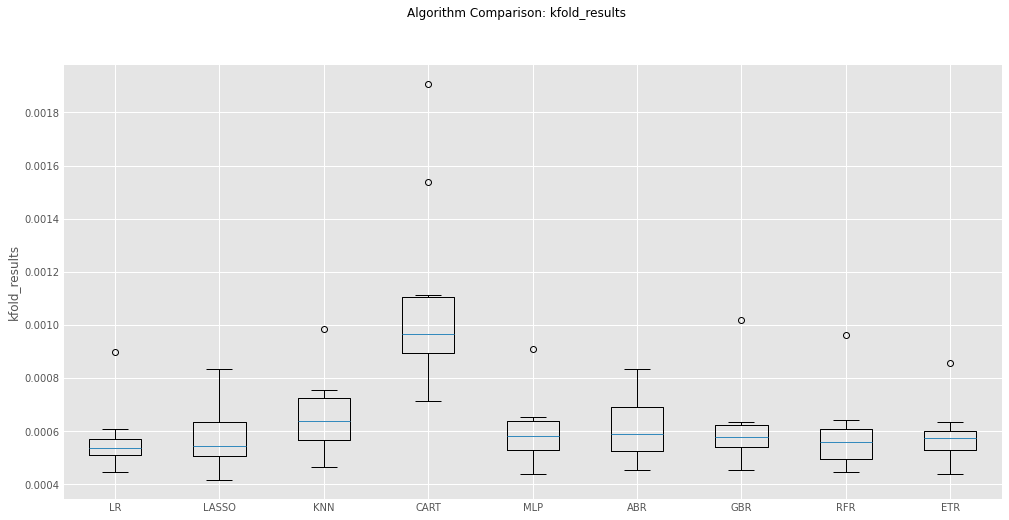

In [33]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison: kfold_results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
plt.ylabel('kfold_results')
fig.set_size_inches(15,8)
plt.show()

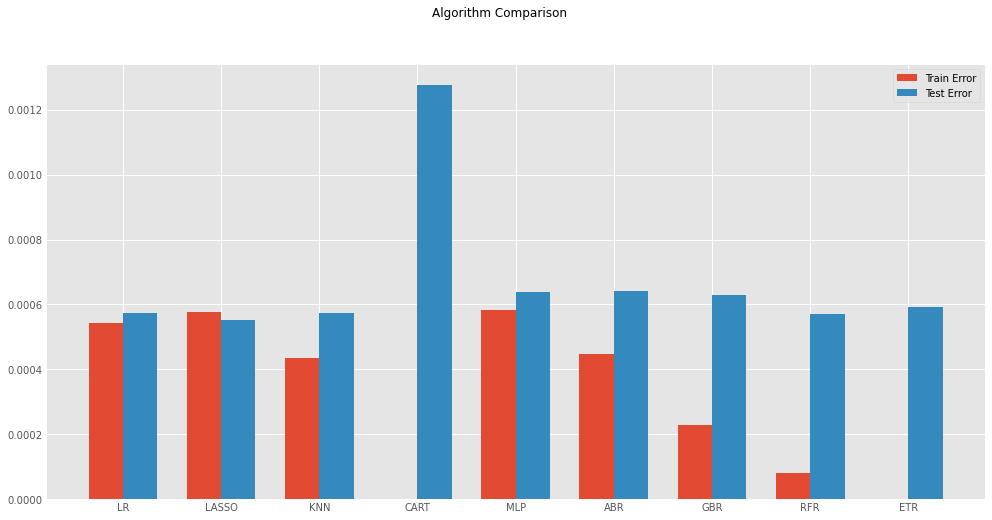

In [34]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

# 5. Hyperparameter Tuning

In [36]:
# 4. Grid search : RandomForestRegressor 

param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\khan1\anaconda3

KeyboardInterrupt: 

In [39]:

model = RandomForestRegressor(n_estimators=400) # rbf is default kernel
model.fit(X_train, Y_train)

C:\Users\khan1\AppData\Local\Temp/ipykernel_8404/2421610730.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=400)

In [40]:
# estimate accuracy on validation set
# transform the validation dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(X_test)
print(mean_squared_error(Y_test, predictions))
print(r2_score(Y_test, predictions))



0.0005844987108334053
-0.06291981584988826


In [43]:
dataset_test=dataset_test[['KHC(t-1)', 'DJIA(t-1)', 'WYNN(t-1)', 'MCD(t-1)', 
                   'FDX(t-1)', 'SP500(t-1)', 'SBUX(t-1)', 'PFE(t-1)', 
                   'HST(t-1)', 'GM(t-1)' ]]

In [44]:
predictions = model.predict(dataset_test)
print(np.exp(predictions))


[0.99316613]


In [46]:

final_value= 112.935577392578 + np.exp(predictions)
final_value

array([113.92874352])